<a href="https://colab.research.google.com/github/nadirawijaya/KomputasiIntelegensia/blob/main/TaskWeek7_NadiraPutriWijaya2106635190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TASK WEEK 7
Nama: Nadira Putri Wijaya

NPM: 2106635190

In [18]:
!pip install emoji==0.6.0
# Import libraries yang dibutuhkan
import torch
import matplotlib.pyplot as plt  # Untuk visualisasi loss curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Untuk evaluasi performa
import seaborn as sns  # Untuk plot confusion matrix

In [19]:
# 1. Load tokenizer dan model dari Hugging Face
# Model ini adalah bertweet-base untuk analisis sentimen tweet
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

In [21]:
# 2. Dataset sintetik untuk fine-tuning (data kecil sebagai contoh)
synthetic_tweets = [
    "Awful experience, won't use again.",    # Negatif
    "The app is fantastic!",                 # Positif
    "Horrible design and very buggy.",       # Negatif
    "The support team solved my issue quickly!"  # Positif
]
synthetic_labels = [0, 1, 0, 1]  # Label: 0 = Negatif, 1 = Positif


In [22]:
# 3. Tokenisasi data input (konversi teks menjadi tensor)
inputs = tokenizer(synthetic_tweets, padding=True, truncation=True, return_tensors="pt")
inputs['labels'] = torch.tensor(synthetic_labels)  # Tambahkan label ke input


In [23]:
# 4. Optimizer menggunakan AdamW untuk memperbarui bobot model
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)  # lr = learning rate

In [24]:
# 5. Training loop untuk fine-tuning model (5 epoch)
losses = []  # List untuk menyimpan nilai loss per epoch
model.train()  # Aktifkan mode training
for epoch in range(5):  # Loop sebanyak 5 epoch
    outputs = model(**inputs)  # Forward pass
    loss = outputs.loss  # Hitung loss
    loss.backward()  # Backpropagation untuk menghitung gradien
    optimizer.step()  # Update parameter model
    optimizer.zero_grad()  # Reset gradien
    losses.append(loss.item())  # Simpan loss ke list
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")  # Cetak loss setiap epoch


Epoch 1, Loss: 1.9539917707443237
Epoch 2, Loss: 1.5635013580322266
Epoch 3, Loss: 1.1896817684173584
Epoch 4, Loss: 1.2120193243026733
Epoch 5, Loss: 0.8343720436096191


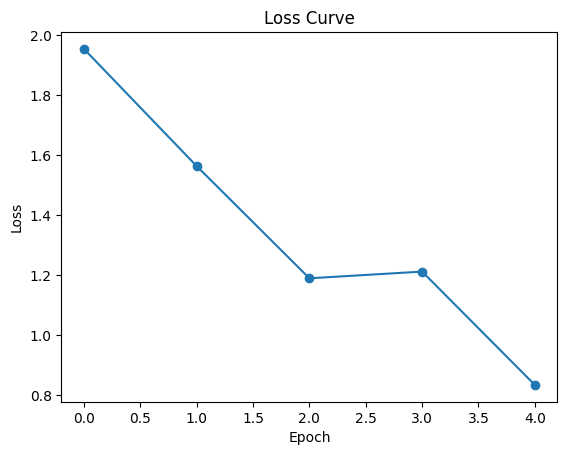

In [25]:
# 6. Visualisasi loss curve untuk melihat konvergensi model
plt.plot(losses, marker='o')
plt.title("Loss Curve")  # Judul plot
plt.xlabel("Epoch")  # Sumbu X: Epoch
plt.ylabel("Loss")  # Sumbu Y: Nilai Loss
plt.show()  # Tampilkan plot

In [26]:
# 7. Testing model dengan data baru setelah fine-tuning
test_tweets = [
    "I can't believe how bad this app is now.",  # Negatif
    "Their service keeps getting better!"        # Positif
]
test_inputs = tokenizer(test_tweets, padding=True, truncation=True, return_tensors="pt")

# Predict dengan model (tanpa menghitung gradien)
with torch.no_grad():  # Aktifkan mode evaluasi
    test_outputs = model(**test_inputs)  # Forward pass
    predictions = torch.argmax(test_outputs.logits, dim=-1)  # Ambil prediksi kelas

# Tampilkan hasil prediksi
for tweet, pred in zip(test_tweets, predictions):
    sentiment = "Positive" if pred == 1 else "Negative"  # Konversi label ke teks
    print(f"Tweet: {tweet} -> Sentiment: {sentiment}")

Tweet: I can't believe how bad this app is now. -> Sentiment: Negative
Tweet: Their service keeps getting better! -> Sentiment: Negative


In [ ]:
# 8. Evaluasi performa menggunakan classification report dan confusion matrix
true_labels = [0, 1]  # Ground truth untuk data test
pred_labels = predictions.numpy()  # Konversi tensor prediksi ke numpy array

# Cetak classification report dengan precision, recall, dan F1-score
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=["Negative", "Positive"]))

# Buat confusion matrix untuk memvisualisasikan hasil klasifikasi
cm = confusion_matrix(true_labels, pred_labels)  # Hitung confusion matrix
# Plot confusion matrix menggunakan seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")  # Judul plot
plt.xlabel("Predicted")  # Sumbu X: Prediksi
plt.ylabel("True")  # Sumbu Y: Ground Truth
plt.show()  # Tampilkan plot

Penjelasan Setiap Bagian:
Import Libraries

transformers: Untuk memuat model BERTweet dan pipeline.
torch: Library PyTorch untuk fine-tuning dan training model.
sklearn.metrics: Digunakan untuk evaluasi model dengan metrik klasifikasi.
seaborn dan matplotlib: Untuk visualisasi hasil evaluasi seperti loss curve dan confusion matrix.
Load Model dan Tokenizer

Model BERTweet digunakan karena spesifik untuk analisis sentimen pada tweet.
Tokenizer akan mengubah teks menjadi representasi tensor yang bisa diproses oleh model.
Data Sintetik

Contoh tweet dengan label positif dan negatif untuk melatih model.
Fine-tuning dilakukan dengan dataset kecil ini.
Training Loop

Proses fine-tuning model dengan menggunakan optimizer AdamW.
Setiap epoch, loss dihitung dan dicetak.
Loss curve ditampilkan untuk melihat pola konvergensi.
Testing dan Prediksi

Model diuji dengan beberapa tweet baru setelah proses fine-tuning.
Prediksi model dikonversi ke bentuk teks untuk ditampilkan.
Evaluasi Model

Classification Report: Menampilkan metrik seperti precision, recall, dan F1-score.
Confusion Matrix: Visualisasi akurasi prediksi model untuk setiap kelas.
Output yang Diharapkan:
Loss Curve: Menampilkan penurunan loss selama training.
Prediksi Sentimen: Setiap tweet diuji dengan prediksi sentimen "Positive" atau "Negative".
Classification Report: Metrik evaluasi seperti precision, recall, dan F1-score.
Confusion Matrix: Menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
